# Pima Indians Diabetes Prediction(Aditya Chowdhury)

In this project the task in hand is to correctly predict diabetic cases for female members of Pima Indian community over the age 21. 

I have used 7 machine learning algorithms and then compared the results using the evaluation metrics between to determine which algorithm gives the best predictions.

The 7 classification algorithms used are Random Forest,Decision Tree,Logistic Regression, Support Vector Machine(SVM), K-Nearest Neighbor(KNN),Naive Bayes(Gaussian) & Gradient Boosing Algorithm

Importing necessary libraries and loading the dataset

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

pima=pd.read_csv('Diabetes.csv')
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Data description

In [3]:
print(pima.shape)
pima.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data detailed information

In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Checking Null Values

In [5]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking missing values

AxesSubplot(0.125,0.125;0.775x0.755)


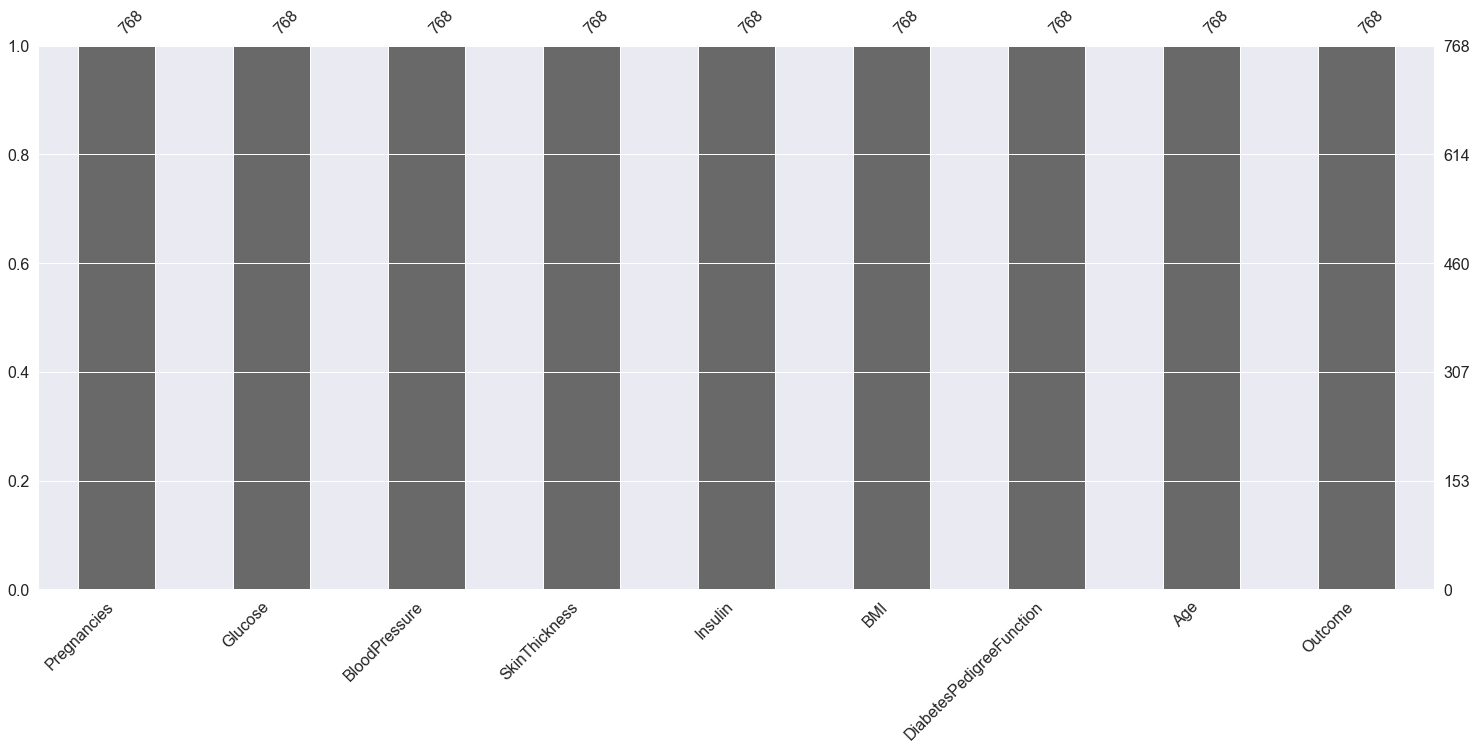

In [6]:
print(msno.bar(pima))


Checking duplicate values

In [8]:
pima[pima.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Checking distribution of data to determine skewness

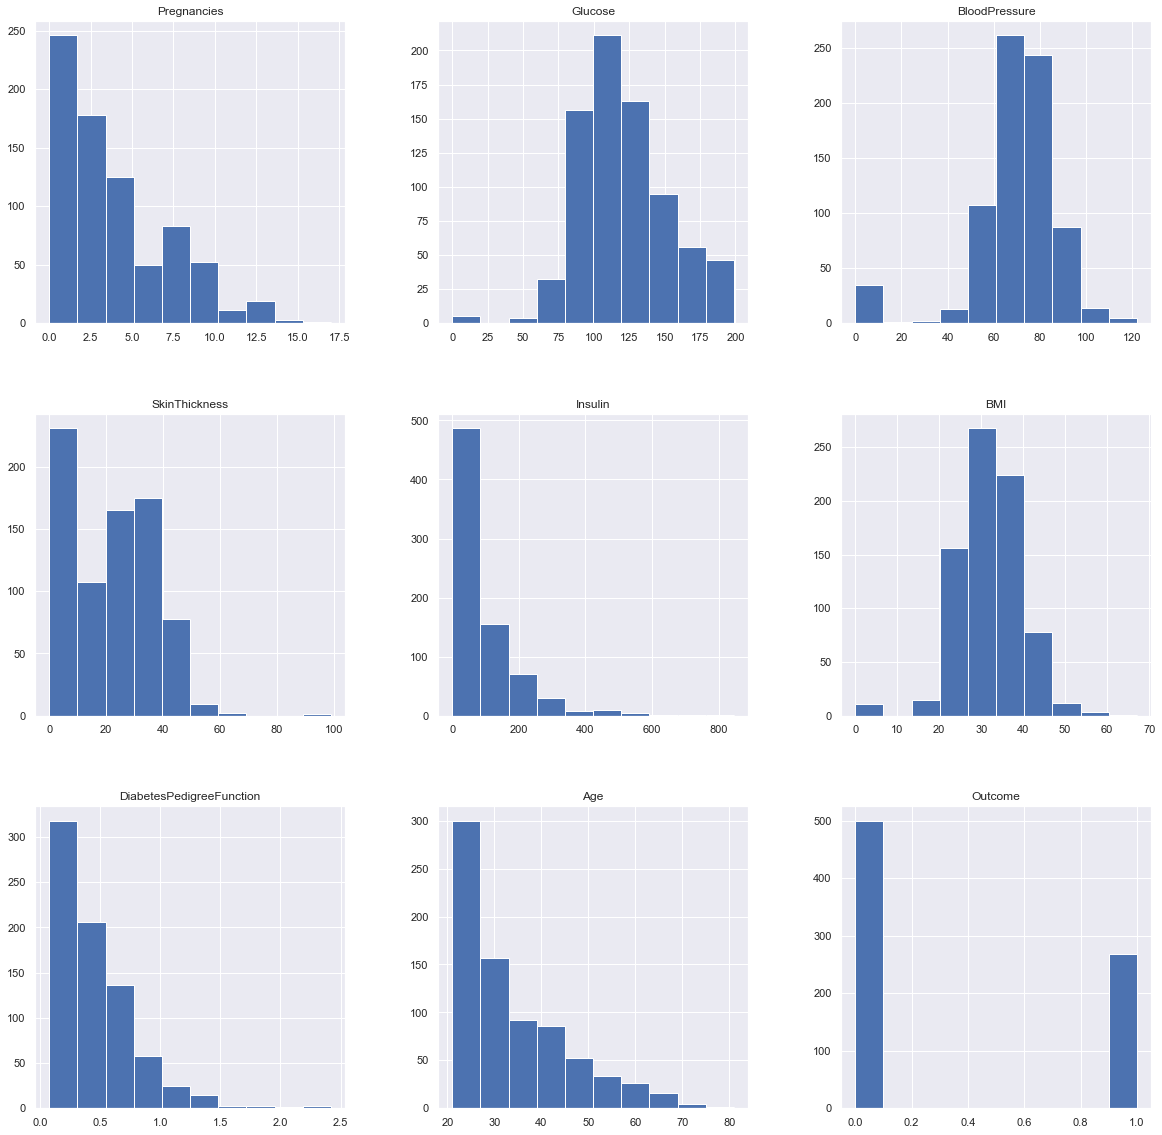

In [10]:
pima.hist(figsize=(20,20))
plt.show()

Replacing missing values(denoted by 0) with median

In [11]:
col=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in col:
    pima[i].replace(0,pima[i].median(),inplace=True)

Checking for Outliers

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


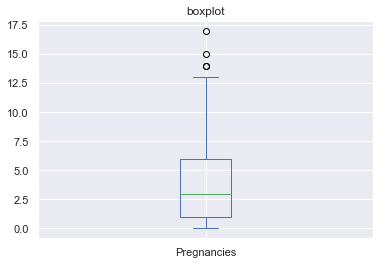

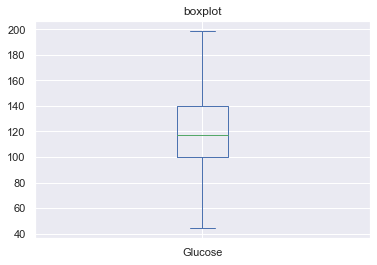

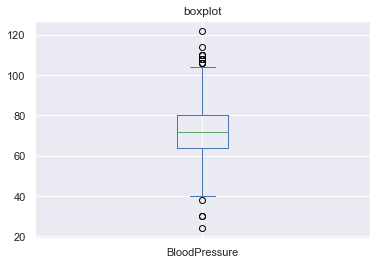

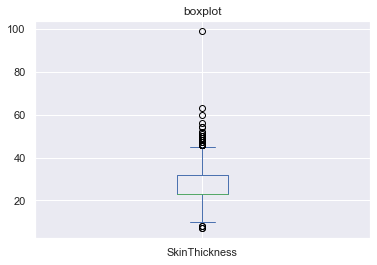

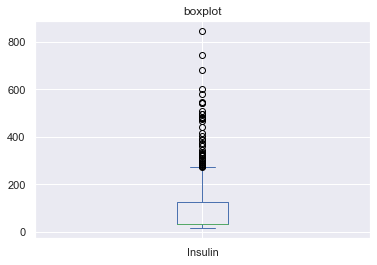

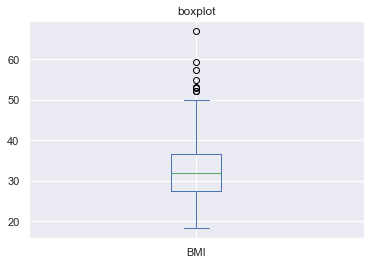

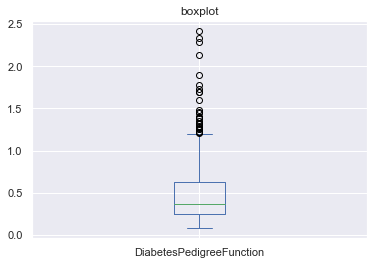

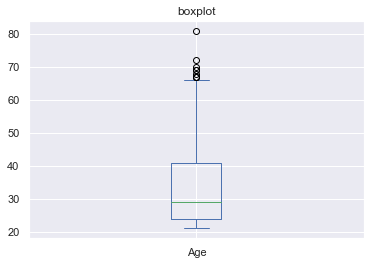

In [12]:
df=pima.drop(columns=['Outcome'])
cols = list(df.columns)
print(cols)
for i in cols:
    a=pima[i].plot(kind='box',title='boxplot')
    plt.show()

Outlier Treatment

In [14]:
for i in cols:
    Q1=pima[i].quantile(.25)
    Q3=pima[i].quantile(.75)
    IQR=Q3-Q1
    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)
    pima[i]=np.where(pima[i]>upper,upper,np.where(pima[i]<lower,lower,pima[i]))

Outliers Removed

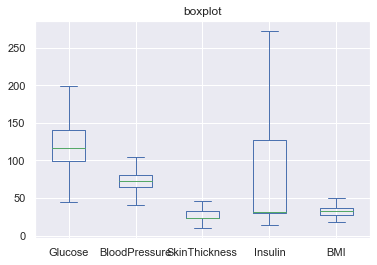

In [16]:

    a=pima[col].plot(kind='box',title='boxplot')
    plt.show()

Visualizing correlation with seaborn

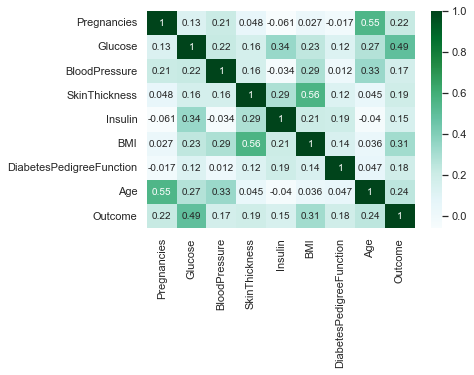

In [17]:
sns.heatmap(pima.corr(),cbar=True,cmap='BuGn',annot=True)
plt.show()

Finding total number of diabetic and non-diabetic cases and percentage of diabetics

In [18]:
positive=pima[pima['Outcome']==1]
negative=pima[pima['Outcome']==0]
per_pos=(len(positive)/len(pima))*100
print('Total number of diabetics:',len(positive))
print('Total number of non-dibetics:',len(negative))
print('Percenage of diabetics:',per_pos,'%')

Total number of diabetics: 268
Total number of non-dibetics: 500
Percenage of diabetics: 34.89583333333333 %


# Plots


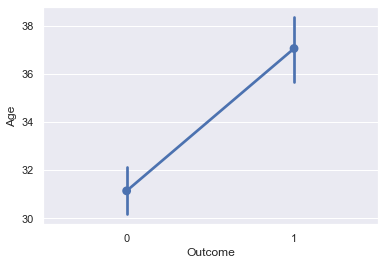

In [19]:
sns.pointplot(x='Outcome',y='Age',data=pima)
plt.show()

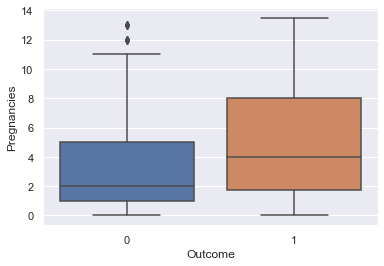

In [20]:
sns.boxplot(x='Outcome',y='Pregnancies',data=pima)
plt.show()

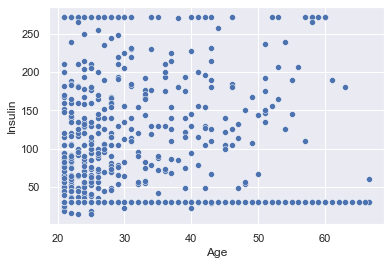

In [21]:
sns.scatterplot(x='Age',y='Insulin',data=pima)
plt.show()

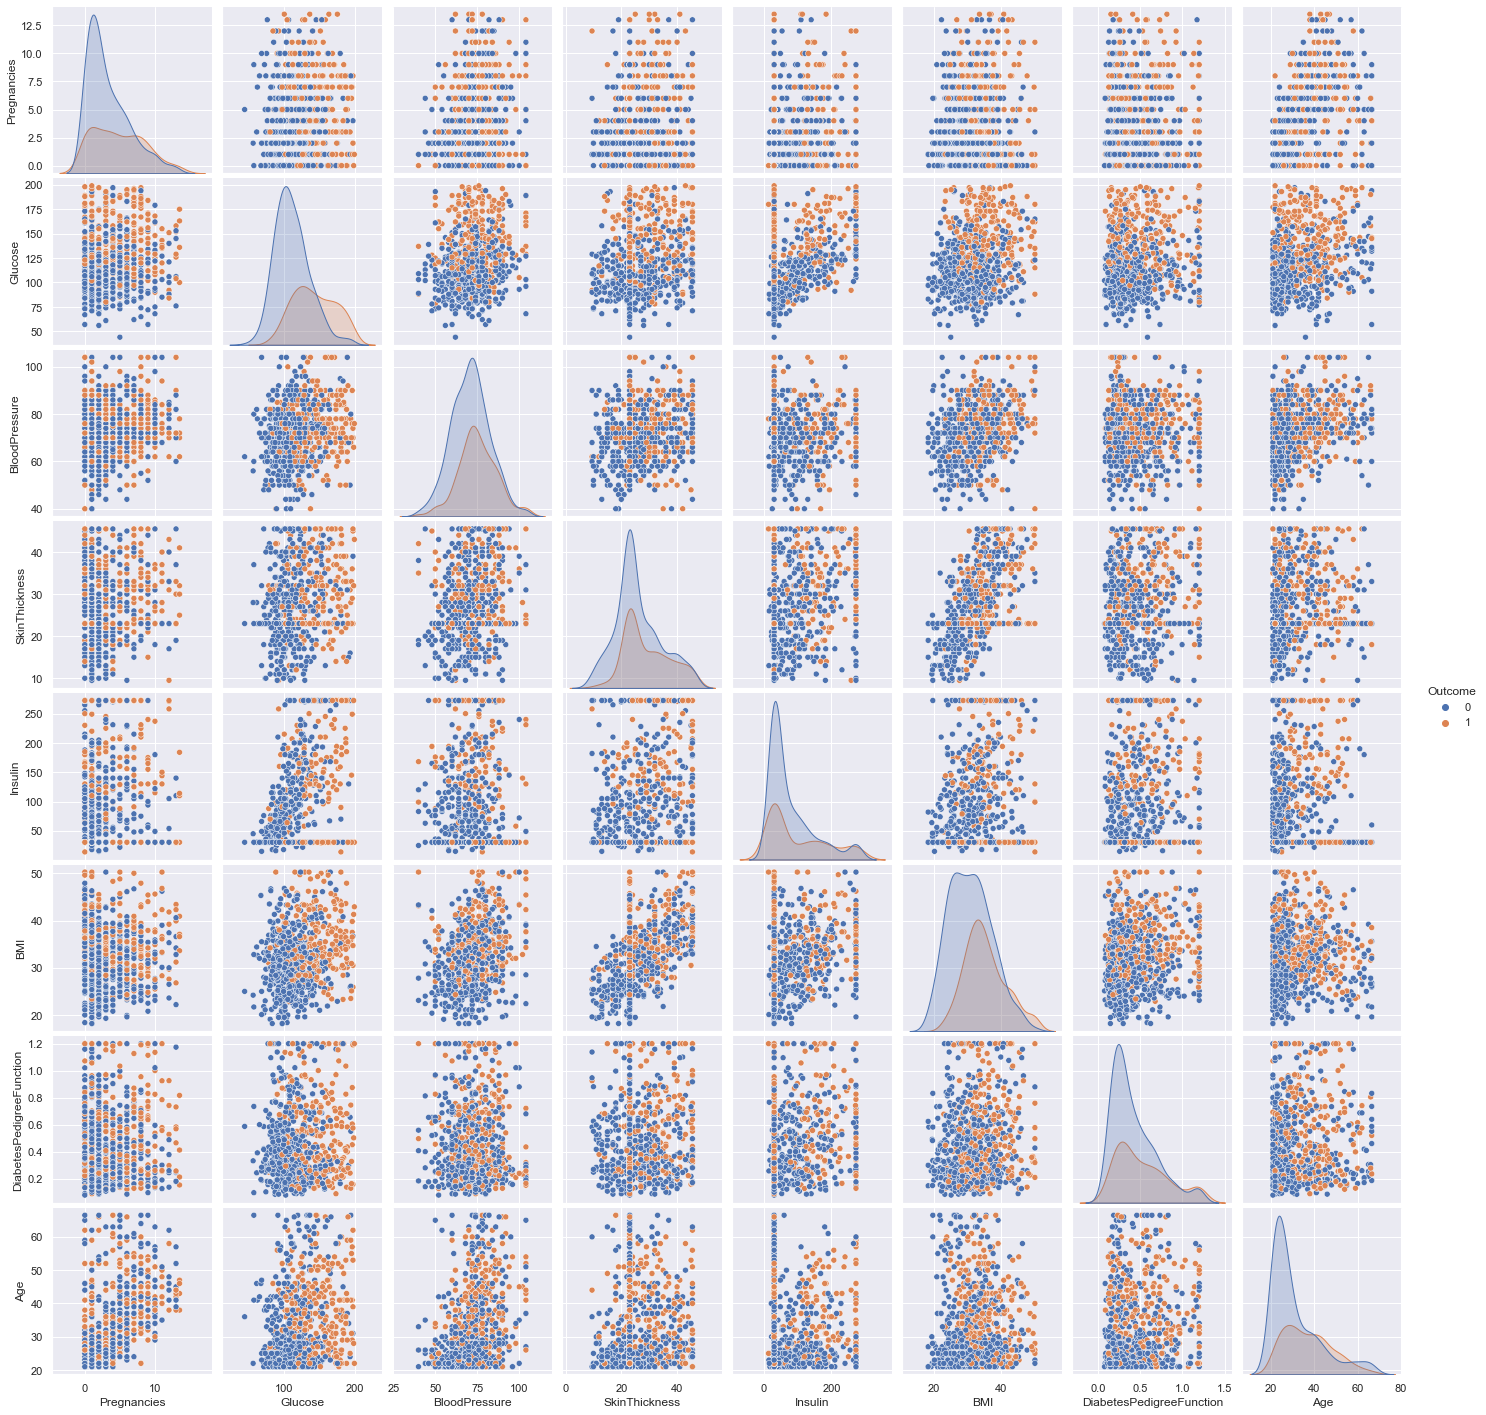

In [22]:
sns.pairplot(pima,hue='Outcome')
plt.show()

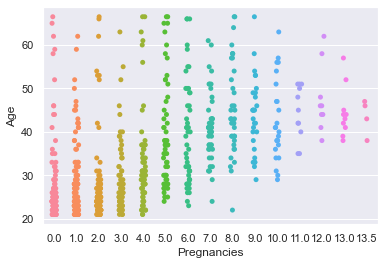

In [23]:
sns.stripplot(x='Pregnancies',y='Age',data=pima)
plt.show()

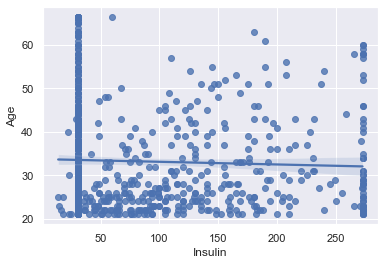

In [24]:
sns.regplot(x='Insulin',y='Age',data=pima)
plt.show()

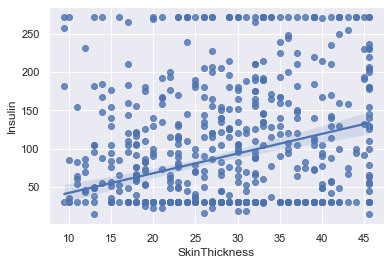

In [25]:
sns.regplot(x='SkinThickness',y='Insulin',data=pima)
plt.show()

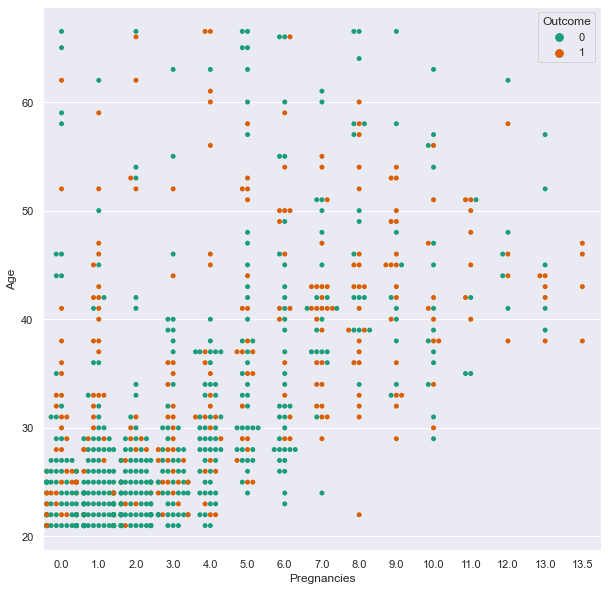

In [26]:
f,ax=plt.subplots(figsize=(10,10))
ax=sns.swarmplot(x='Pregnancies',y='Age',hue='Outcome',palette='Dark2',data=pima)
ax=sns.set(style='darkgrid')

Checking Variance

In [27]:
pima.var()

Pregnancies                   11.183383
Glucose                      926.489244
BloodPressure                136.822073
SkinThickness                 71.358957
Insulin                     5819.763857
BMI                           44.457247
DiabetesPedigreeFunction       0.081565
Age                          135.219778
Outcome                        0.227483
dtype: float64

Standardizing the data

In [28]:
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(pima.drop(['Outcome'],axis=1),),
    columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
    'DiabetesPedigreeFunction','Age'])
Y=pima.Outcome

Splitting the data

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(537, 8)
(231, 8)
(537,)
(231,)


# Machine Learning 

Random Forest

Accuracy score(Random Forest) : 0.7532467532467533


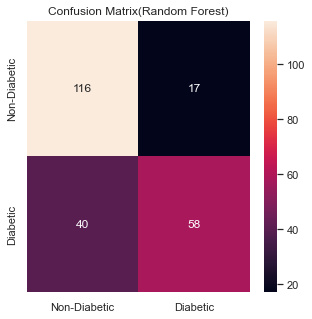

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
prediction=rfc.predict(X_test)
acc_rfc=accuracy_score(Y_test,prediction)
print('Accuracy score(Random Forest) :',acc_rfc)
plt.figure(figsize=(5,5))
labels=['Non-Diabetic','Diabetic']
plt.title("Confusion Matrix(Random Forest)")
sns.heatmap(confusion_matrix(Y_test,prediction),xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.show()

Decision Tree

Accuracy score(Decision Tree) : 0.6493506493506493


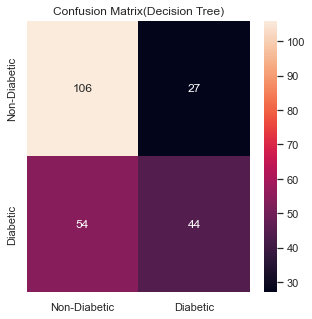

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
prediction=dtc.predict(X_test)
acc_dtc=accuracy_score(Y_test,prediction)
print('Accuracy score(Decision Tree) :',acc_dtc)
plt.figure(figsize=(5,5))
labels=['Non-Diabetic','Diabetic']
plt.title("Confusion Matrix(Decision Tree)")
sns.heatmap(confusion_matrix(Y_test,prediction),xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.show()

Logistic Regression

Accuracy score(Logistic Regression) : 0.7532467532467533


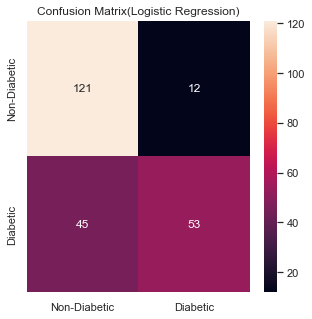

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
prediction=lr.predict(X_test)
acc_lr=accuracy_score(Y_test,prediction)
print('Accuracy score(Logistic Regression) :',acc_lr)
plt.figure(figsize=(5,5))
labels=['Non-Diabetic','Diabetic']
plt.title("Confusion Matrix(Logistic Regression)")
sns.heatmap(confusion_matrix(Y_test,prediction),xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.show()

Support Vector Machine

Accuracy score(SVM) : 0.7316017316017316


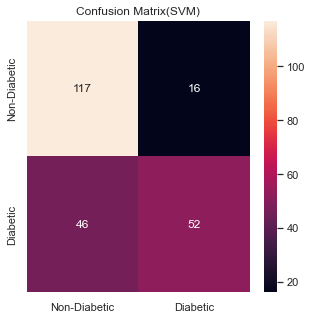

In [33]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,Y_train)
prediction=svm.predict(X_test)
acc_svm=accuracy_score(Y_test,prediction)
print('Accuracy score(SVM) :',acc_svm)
plt.figure(figsize=(5,5))
labels=['Non-Diabetic','Diabetic']
plt.title("Confusion Matrix(SVM)")
sns.heatmap(confusion_matrix(Y_test,prediction),xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.show()

KNN

Accuracy score(KNN) : 0.7272727272727273


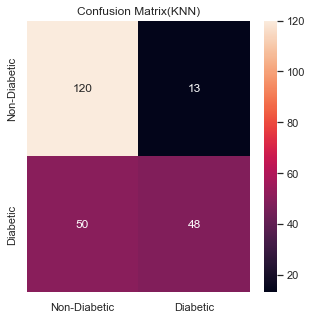

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)
prediction=knn.predict(X_test)
acc_knn=accuracy_score(Y_test,prediction)
print('Accuracy score(KNN) :',acc_knn)
plt.figure(figsize=(5,5))
labels=['Non-Diabetic','Diabetic']
plt.title("Confusion Matrix(KNN)")
sns.heatmap(confusion_matrix(Y_test,prediction),xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.show()


Naive Bayes(Gaussian)

Accuracy score(Naive Bayes(Gaussian)) : 0.7445887445887446


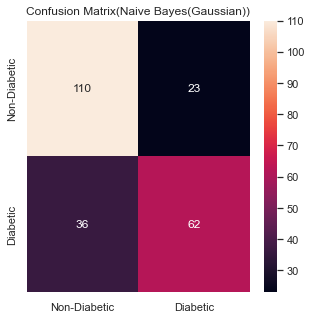

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train,Y_train)
prediction=gnb.predict(X_test)
acc_gnb=accuracy_score(Y_test,prediction)
print('Accuracy score(Naive Bayes(Gaussian)) :',acc_gnb)
plt.figure(figsize=(5,5))
labels=['Non-Diabetic','Diabetic']
plt.title("Confusion Matrix(Naive Bayes(Gaussian))")
sns.heatmap(confusion_matrix(Y_test,prediction),xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.show()

Gradient Boosting

Accuracy score(Gradient Boosting) : 0.7402597402597403


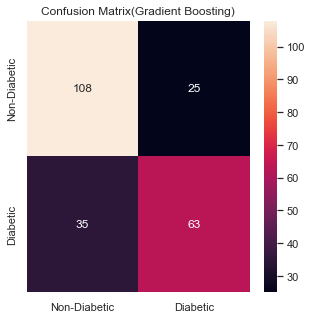

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
prediction=gbc.predict(X_test)
acc_gbc=accuracy_score(Y_test,prediction)
print('Accuracy score(Gradient Boosting) :',acc_gbc)
plt.figure(figsize=(5,5))
labels=['Non-Diabetic','Diabetic']
plt.title("Confusion Matrix(Gradient Boosting)")
sns.heatmap(confusion_matrix(Y_test,prediction),xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.show()


Comparing all the algorithms to determine the best one

In [37]:
accuracy= {'Random Forest':acc_rfc,'Decision Tree':acc_dtc,
           'Logistic Regression':acc_lr,'SVM':acc_svm,
           'KNN':acc_knn,'Naive Bayes':acc_gnb,'Gradient Boosting':acc_gbc}
dict={'Accuracy Score':accuracy}
eval_metric_comp=pd.DataFrame(dict)
eval_metric_comp.sort_values(by='Accuracy Score',ascending=False)


,Accuracy Score
Logistic Regression,0.753247
Random Forest,0.753247
Naive Bayes,0.744589
Gradient Boosting,0.740260
SVM,0.731602
KNN,0.727273
Decision Tree,0.649351


# Conclusion:
We can thus conclude that of all the machine learning algorithms used for this particular 
dataset 'Random Forest' and'Logistic Regression' algorithms give the best predictions 